In [2]:
##Library Importing
import numpy as np
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt

In [2]:
# Data Importing - Using the Resized Cropped Dataset

NumBatchFiles = 9 # num files to store the training data
PercentSplit = .8 # test-train split ratio

#read in the labels for each image 
labels_df = pd.read_csv(r'Raw_Data/trainLabels_cropped.csv', index_col=0)
#get rid of the dataframes that aren't relevant
del labels_df['Unnamed: 0.1'] # get rid of redundant column

#read in the training set files 
ImageDir = "Raw_Data/resized_train_cropped/resized_train_cropped/*.jpeg"
filenames = [img for img in glob.glob(ImageDir)]
filenames.sort() # sort so each pair of images are together 
filenames = np.array(filenames)

#sort the dataframe by ascii order with the labels so they match the order of the left and right eye images
labels_df = labels_df.sort_values(by=['image'])
labels_array = labels_df.to_numpy()

# break up data by class
Class0Set = np.where(labels_array[:, 1] == 0)[0]
Class1Set = np.where(labels_array[:, 1] == 1)[0]
Class2Set = np.where(labels_array[:, 1] == 2)[0]
Class3Set = np.where(labels_array[:, 1] == 3)[0]
Class4Set = np.where(labels_array[:, 1] == 4)[0]
MasterClassSet = [Class0Set,Class1Set,Class2Set,Class3Set,Class4Set]

#shuffle indices randomly 2x
np.random.shuffle(Class0Set)
np.random.shuffle(Class1Set)
np.random.shuffle(Class2Set)
np.random.shuffle(Class3Set)
np.random.shuffle(Class4Set)

np.random.shuffle(Class0Set)
np.random.shuffle(Class1Set)
np.random.shuffle(Class2Set)
np.random.shuffle(Class3Set)
np.random.shuffle(Class4Set)

In [3]:
# entire training data is large, so we store the data in 4 separate batch files
# each with class distribution in same proportion as the entire training data set


# this section iterates through each batch
# for each batch iteration, 20% of from each class is added to the Xtrain array
ClassBatchStartIndices = np.zeros((1, 5))

for batch in range(0, NumBatchFiles):
    X_train = []
    Y_train = []

    for ClassNo in range(0, 5):

        # append  PercentSplit / NumBatches % of data of class to the train data
        # get the set indices for the class in question
        Idx = MasterClassSet[ClassNo]
        # get all samples for the class in question
        BatchFileNames = filenames[Idx]
        Ylabels = labels_array[Idx]
        ClassSize = len(Idx)  # the total number of samples in each class 

        # how many samples to pull from the class and where to start pulling from
        ClassBatchSampleSize = np.floor(
            ClassSize * (PercentSplit / NumBatchFiles)).astype(int)

        # get the index from where to start pulling samples
        ClassBatchBegIndex = ClassBatchStartIndices[0, ClassNo].astype(int)

        # read in the the specified sub-section of images for the class in question
        images_data = [plt.imread(
            img) for img in BatchFileNames[ClassBatchBegIndex:ClassBatchBegIndex + ClassBatchSampleSize]]
        #images_data = np.array(images_data[ClassBatchBegIndex:ClassBatchBegIndex + ClassBatchSampleSize])

        # add the specified sub-section of images from the class in question
        X_train = X_train + images_data
        Y_train = Y_train + \
            list(Ylabels[ClassBatchBegIndex:ClassBatchBegIndex +
                         ClassBatchSampleSize])

        # update the class batch start index for the next batch
        ClassBatchStartIndices[0,
                               ClassNo] = ClassBatchBegIndex + ClassBatchSampleSize
        print('Class', ClassNo, 'Class Addition to Xtrain', len(images_data), 'Y Addition to Ytrain', len(list(Ylabels[ClassBatchBegIndex:ClassBatchBegIndex + ClassBatchSampleSize])), '\n')

        print('Batch', batch, 'Class', ClassNo, 'XtrainSize', len(
            X_train), 'Ytrain size', len(Y_train), '\n')

    # save Xtrain as a batch file
    np.save('Xtrain_Batch'+str(batch), X_train)
    np.save('Ytrain_Batch'+str(batch), Y_train)

Class 0 Class Addition to Xtrain 2293 Y Addition to Ytrain 2293 

Batch 0 Class 0 XtrainSize 2293 Ytrain size 2293 

Class 1 Class Addition to Xtrain 216 Y Addition to Ytrain 216 

Batch 0 Class 1 XtrainSize 2509 Ytrain size 2509 

Class 2 Class Addition to Xtrain 470 Y Addition to Ytrain 470 

Batch 0 Class 2 XtrainSize 2979 Ytrain size 2979 

Class 3 Class Addition to Xtrain 77 Y Addition to Ytrain 77 

Batch 0 Class 3 XtrainSize 3056 Ytrain size 3056 

Class 4 Class Addition to Xtrain 62 Y Addition to Ytrain 62 

Batch 0 Class 4 XtrainSize 3118 Ytrain size 3118 

Class 0 Class Addition to Xtrain 2293 Y Addition to Ytrain 2293 

Batch 1 Class 0 XtrainSize 2293 Ytrain size 2293 

Class 1 Class Addition to Xtrain 216 Y Addition to Ytrain 216 

Batch 1 Class 1 XtrainSize 2509 Ytrain size 2509 

Class 2 Class Addition to Xtrain 470 Y Addition to Ytrain 470 

Batch 1 Class 2 XtrainSize 2979 Ytrain size 2979 

Class 3 Class Addition to Xtrain 77 Y Addition to Ytrain 77 

Batch 1 Class 3 Xt

['229_left' 0]


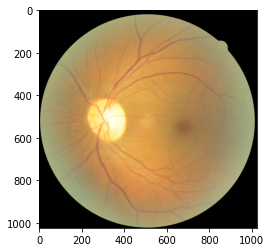

In [4]:
test = X_train
FileNo = 6
plt.imshow(test[FileNo])
print(Y_train[FileNo])

In [5]:
# Create Test Data
X_test = []
Y_test = []
#NumBatchFiles = 2  # two test batch files

for batch in range(0, 2):

    X_test = []
    Y_test = []

    for ClassNo in range(0,5):

        # append  PercentSplit / NumBatches % of data of class to the test data
        # get the set indices for the class in question
        Idx = MasterClassSet[ClassNo]
        # get all samples for the class in question
        BatchFileNames = filenames[Idx]
        Ylabels = labels_array[Idx]
        ClassSize = len(Idx)  # the total number of samples in each class

        # get the index from where to start pulling samples
        ClassBatchBegIndex = ClassBatchStartIndices[0, ClassNo].astype(int)

        # how many samples to pull from the class and where to start pulling from
        ClassBatchSampleSize = np.floor(
            ClassSize * (PercentSplit / NumBatchFiles)).astype(int)

        if (batch == 1):  # if on last batch, pull all remaining data and save the data
            # read in the the specified sub-section of images for the class in question
            images_data = [plt.imread(
                img) for img in BatchFileNames[ClassBatchBegIndex:]]

            # add the specified sub-section of images from the class in question

            X_test = X_test + images_data
            Y_test = Y_test + \
                list(Ylabels[ClassBatchBegIndex:])
            print('Class', ClassNo, 'Class Addition to Xtest', len(images_data),
                  'Y Addition to Ytest', len(list(Ylabels[ClassBatchBegIndex:])), '\n')
            print('Batch', batch, 'Class', ClassNo, 'XtestSize', len(
                X_test), 'Ytest size', len(Y_test), '\n')
           
        else:
            # read in the the specified sub-section of images for the class in question
            images_data = [plt.imread(
                img) for img in BatchFileNames[ClassBatchBegIndex:ClassBatchBegIndex + ClassBatchSampleSize]]
            #images_data = np.array(images_data[ClassBatchBegIndex:ClassBatchBegIndex + ClassBatchSampleSize])

            # add the specified sub-section of images from the class in question
            X_test = X_test + images_data
            Y_test = Y_test + \
                list(Ylabels[ClassBatchBegIndex:ClassBatchBegIndex +
                             ClassBatchSampleSize])

            # update the class batch start index for the next batch
            ClassBatchStartIndices[0,
                                   ClassNo] = ClassBatchBegIndex + ClassBatchSampleSize
            print('Class', ClassNo, 'Class Addition to Xtest', len(images_data), 'Y Addition to Ytest', len(
                list(Ylabels[ClassBatchBegIndex:ClassBatchBegIndex + ClassBatchSampleSize])), '\n')
            print('Batch', batch, 'Class', ClassNo, 'XtestSize', len(
                X_test), 'Ytest size', len(Y_test), '\n')
    np.save('Xtest_Batch'+str(batch), X_test)
    np.save('Ytest_Batch'+str(batch), Y_test)


Class 0 Class Addition to Xtest 2293 Y Addition to Ytest 2293 

Batch 0 Class 0 XtestSize 2293 Ytest size 2293 

Class 1 Class Addition to Xtest 216 Y Addition to Ytest 216 

Batch 0 Class 1 XtestSize 2509 Ytest size 2509 

Class 2 Class Addition to Xtest 470 Y Addition to Ytest 470 

Batch 0 Class 2 XtestSize 2979 Ytest size 2979 

Class 3 Class Addition to Xtest 77 Y Addition to Ytest 77 

Batch 0 Class 3 XtestSize 3056 Ytest size 3056 

Class 4 Class Addition to Xtest 62 Y Addition to Ytest 62 

Batch 0 Class 4 XtestSize 3118 Ytest size 3118 

Class 0 Class Addition to Xtest 2872 Y Addition to Ytest 2872 

Batch 1 Class 0 XtestSize 2872 Ytest size 2872 

Class 1 Class Addition to Xtest 278 Y Addition to Ytest 278 

Batch 1 Class 1 XtestSize 3150 Ytest size 3150 

Class 2 Class Addition to Xtest 588 Y Addition to Ytest 588 

Batch 1 Class 2 XtestSize 3738 Ytest size 3738 

Class 3 Class Addition to Xtest 102 Y Addition to Ytest 102 

Batch 1 Class 3 XtestSize 3840 Ytest size 3840 

C

3118 

3118 

['8262_left' 0]
['24484_right' 0]
['41640_right' 1]
['21874_right' 3]


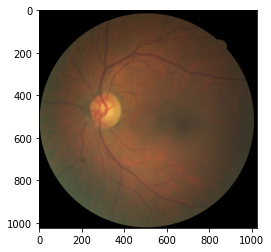

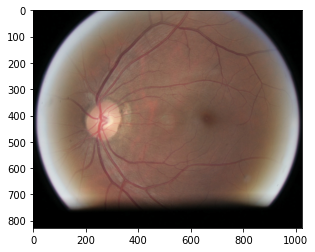

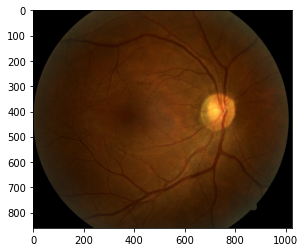

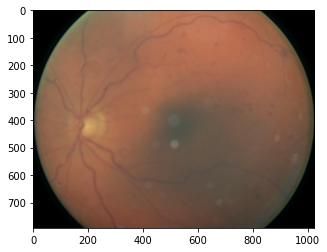

In [3]:
#checking some random images

SampleNo = [250, 600, 2500,3000]
Xbtest = np.load('Xtest_Batch0.npy', allow_pickle = True)
Ybtest = np.load('Ytest_Batch0.npy', allow_pickle=True)
print(len(Xbtest),'\n')
print(len(Ybtest), '\n')

fig, ax = plt.subplots()
plt.imshow(Xbtest[SampleNo[0]])
print(Ybtest[SampleNo[0]])


fig, ax = plt.subplots()
plt.imshow(Xbtest[SampleNo[1]])
print(Ybtest[SampleNo[1]])

fig, ax = plt.subplots()
plt.imshow(Xbtest[SampleNo[2]])
print(Ybtest[SampleNo[2]])


fig, ax = plt.subplots()
plt.imshow(Xbtest[SampleNo[3]])
print(Ybtest[SampleNo[3]])



In [7]:
print(Xbtest[0].shape)

(765, 1024, 3)


In [26]:
whos

Variable          Type                          Data/Info
---------------------------------------------------------
NamespaceMagics   MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
SampleNo          list                          n=4
Xbtest            ndarray                       3118: 3118 elems, type `object`, 24944 bytes
Ybtest            ndarray                       3118x2: 6236 elems, type `object`, 49888 bytes
autopep8          module                        <module 'autopep8' from '<...>te-packages/autopep8.py'>
ax                AxesSubplot                   AxesSubplot(0.20201,0.125;0.62098x0.755)
cv2               module                        <module 'cv2.cv2' from '/<...>v2.cpython-38-darwin.so'>
fig               Figure                        Figure(432x288)
final_result      ndarray                       3000x1000x1000: 3000000000 elems, type `int8`, 3000000000 bytes (2861.02294921875 Mb)
get_ipython       function                   

In [4]:
whos

Variable          Type                          Data/Info
---------------------------------------------------------
NamespaceMagics   MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
SampleNo          list                          n=4
Xbtest            ndarray                       3118: 3118 elems, type `object`, 24944 bytes
Ybtest            ndarray                       3118x2: 6236 elems, type `object`, 49888 bytes
autopep8          module                        <module 'autopep8' from '<...>te-packages/autopep8.py'>
ax                AxesSubplot                   AxesSubplot(0.187113,0.125;0.650774x0.755)
cv2               module                        <module 'cv2.cv2' from '/<...>v2.cpython-38-darwin.so'>
fig               Figure                        Figure(432x288)
get_ipython       function                      <function get_ipython at 0x7fd747bac430>
getsizeof         builtin_function_or_method    <built-in function getsizeof>
glob      